In [68]:
import json
import math

file = open('/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/e100-large/tmp-times.json',)
cfile = open('/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/config.json',)
data = json.load(file)
config = json.load(cfile)

In [69]:
print(config)

{'budgetParameter': 0.01, 'deadlineParameter': 0.01, 'functionTypes': ['lambda-6144', 'lambda-5120', 'lambda-4096', 'lambda-3072', 'lambda-2560', 'lambda-2048', 'lambda-1536', 'lambda-1024'], 'count': 5, 'provider': 'AWS', 'algorithm': 'moheft-loss', 'workflow': 'montage', 'dag': './ellipsoids-200.json', 'prices': {'AWS': {'lambda-128': 2.08e-07, 'lambda-256': 4.17e-07, 'lambda-512': 8.33e-07, 'lambda-768': 1.25e-06, 'lambda-1024': 1.667e-06, 'lambda-1280': 2.084e-06, 'lambda-1536': 2.5e-06, 'lambda-1792': 2.917e-06, 'lambda-2048': 3.333e-06, 'lambda-2560': 4.167e-06, 'lambda-3072': 5e-06, 'lambda-4096': 6.667e-06, 'lambda-5120': 8.334e-06, 'lambda-6144': 1e-05, 'fargate-512025': 1.1244e-05, 'fargate-1050': 4.4977e-05, 'fargate-21': 0.000179911, 'fargate-42': 0.000719644}, 'GCF': {'256': 4.63e-07, '512': 9.25e-07, '1024': 1.65e-06, '2048': 2.9e-06}, 'overheads': {'AWS': 0.043, 'GCF': 0.15, 'IBM': 0.13}}}


In [70]:
def decorate_with_level():
    
    def have_common(list1, list2):
        return sum([element in list1 for element in list2]) > 0
    
    for proc in data["processes"]:
        ancestors = [p.get("level", 0) for p in data["processes"] if have_common(p["outs"], proc["ins"])]
        ancestors.append(0)
        proc["level"] = max(ancestors) + 1

def get_level_to_proc():
    level_to_proc = {}
    for proc in data["processes"]:
        lvl = proc["level"]
        tasks = level_to_proc.get(lvl, [])
        tasks.append(proc["config"]["id"])
        level_to_proc[lvl] = tasks
    return level_to_proc

decorate_with_level()
level_to_proc = get_level_to_proc()

In [71]:
print(level_to_proc)

{1: [1], 2: [2, 3, 4, 5], 3: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

In [72]:
def get_id_to_process():
    id_to_process = {}
    for proc in data["processes"]:
        id_to_process[proc["config"]["id"]] = proc
    return id_to_process

id_to_process = get_id_to_process()

In [73]:
print(id_to_process)

{1: {'name': 'generateData', 'function': 'awsCommand', 'type': 'dataflow', 'firingLimit': 1, 'config': {'executor': {'executable': 'generateData.js', 'args': []}, 'id': 1}, 'ins': [0], 'outs': [1], 'startTime': {'lambda-6144': 0, 'lambda-5120': 0, 'lambda-4096': 0, 'lambda-3072': 0, 'lambda-2560': 0, 'lambda-2048': 0, 'lambda-1536': 0, 'lambda-1024': 0}, 'finishTime': {'lambda-6144': 731, 'lambda-5120': 739, 'lambda-4096': 719, 'lambda-3072': 620, 'lambda-2560': 624, 'lambda-2048': 723, 'lambda-1536': 718, 'lambda-1024': 781}, 'level': 1}, 2: {'name': 'create_dat_0', 'function': 'awsCommand', 'type': 'dataflow', 'firingLimit': 1, 'config': {'executor': {'executable': 'createDat.js', 'args': ['0.dat']}, 'id': 2}, 'ins': [1], 'outs': [2], 'startTime': {'lambda-6144': 741, 'lambda-5120': 747, 'lambda-4096': 725, 'lambda-3072': 626, 'lambda-2560': 632, 'lambda-2048': 729, 'lambda-1536': 725, 'lambda-1024': 789}, 'finishTime': {'lambda-6144': 1262, 'lambda-5120': 1173, 'lambda-4096': 1229, 

In [74]:
def get_id_to_executions():
    id_to_executions = {}
    for proc in data["processes"]:
        executions = []
        for function in proc["startTime"]:
            time = proc["finishTime"][function] - proc["startTime"][function]
            price = config['prices']['AWS'][function]
            cost = price * math.ceil(time / 100)
            executions.append({
                "cost": cost, 
                "time": time, 
                "function": function,
                "proc_id": proc["config"]["id"]
            })
        executions = sorted(executions, key=lambda x: x["time"]) #posortowane rosnąco po czasie
        id_to_executions[proc["config"]["id"]] = executions
    return id_to_executions

id_to_executions = get_id_to_executions()

In [75]:
print(id_to_executions)

{1: [{'cost': 3.5000000000000004e-05, 'time': 620, 'function': 'lambda-3072', 'proc_id': 1}, {'cost': 2.9169e-05, 'time': 624, 'function': 'lambda-2560', 'proc_id': 1}, {'cost': 2e-05, 'time': 718, 'function': 'lambda-1536', 'proc_id': 1}, {'cost': 5.3336e-05, 'time': 719, 'function': 'lambda-4096', 'proc_id': 1}, {'cost': 2.6664e-05, 'time': 723, 'function': 'lambda-2048', 'proc_id': 1}, {'cost': 8e-05, 'time': 731, 'function': 'lambda-6144', 'proc_id': 1}, {'cost': 6.6672e-05, 'time': 739, 'function': 'lambda-5120', 'proc_id': 1}, {'cost': 1.3336e-05, 'time': 781, 'function': 'lambda-1024', 'proc_id': 1}], 2: [{'cost': 1e-05, 'time': 373, 'function': 'lambda-1536', 'proc_id': 2}, {'cost': 2.0835e-05, 'time': 406, 'function': 'lambda-2560', 'proc_id': 2}, {'cost': 2.5e-05, 'time': 409, 'function': 'lambda-3072', 'proc_id': 2}, {'cost': 4.167e-05, 'time': 426, 'function': 'lambda-5120', 'proc_id': 2}, {'cost': 4.0002e-05, 'time': 504, 'function': 'lambda-4096', 'proc_id': 2}, {'cost': 

In [76]:
#liczenie budgetu i deadline'u
budget_factor = 0.05
deadline_factor = 0.2

def get_min(proc_id, key):
    executions = id_to_executions[proc_id]
    return sorted(executions, key=lambda x: x[key])[0][key]

def get_max(proc_id, key):
    executions = id_to_executions[proc_id]
    return sorted(executions, key=lambda x: x[key], reverse=True)[0][key]

def get_deadline(fun):
    result = 0
    for level in level_to_proc:
        options = [fun(proc_id, 'time') for proc_id in level_to_proc[level]]
        result += sorted(options, reverse=True)[0]
    return result

def get_budget(fun):
    result = 0
    for level in level_to_proc:
        options = [fun(proc_id, 'cost') for proc_id in level_to_proc[level]]
        result += sum(options)
    return result

MAX_DEADLINE = get_deadline(get_max)
MIN_DEADLINE = get_deadline(get_min)
USER_DEADLINE = MIN_DEADLINE + (MAX_DEADLINE - MIN_DEADLINE) * deadline_factor

MAX_BUDGET = get_budget(get_max)
MIN_BUDGET = get_budget(get_min)
USER_BUDGET = MIN_BUDGET + (MAX_BUDGET - MIN_BUDGET) * budget_factor

print(f'MAX DEADLINE {MAX_DEADLINE}')
print(f'MIN DEADLINE {MIN_DEADLINE}')
print(f'USER DEADLINE {USER_DEADLINE}')
print(f'MAX BUDGET {MAX_BUDGET}')
print(f'MIN BUDGET {MIN_BUDGET}')
print(f'USER BUDGET {USER_BUDGET}')

MAX DEADLINE 55108
MIN DEADLINE 12211
USER DEADLINE 20790.4
MAX BUDGET 0.197659624
MIN BUDGET 0.11631843100000011
USER BUDGET 0.12038549065000011


In [77]:
# usuwa funkcje dla których istnieje tańsza i równie szybka lub szybsza funkcja 
def prune_useless(array):
    i = 0
    while i < (len(array)-1):
        if array[i]["cost"] <= array[i+1]["cost"]:
            array.pop(i+1)
        else:
            i += 1
    return array

def get_index(array, deadline):
    index = 0
    while index < len(array) and array[index]['time'] <= deadline:
        index += 1
    return index-1

def get_level_to_possibilities():
    level_to_possibilities = {}
    for level in level_to_proc.keys():
        tasks = level_to_proc[level]
        array = []
        possibilities = []
        deadlines = []
        for task in tasks:
            a = id_to_executions[task].copy() # a posortowane jest rosnąco po czasie
            a = prune_useless(a)
            array.append(a)
            for execution in a:
                deadlines.append(execution["time"])
        
        for deadline in deadlines:
            cost = 0
            functions = {}
            shouldAppend = True
            for a in array:
                index = get_index(a, deadline)
                if a[index]['time'] > deadline:
                    shouldAppend = False
                    break
                cost += a[index]["cost"]
                functions[a[index]["proc_id"]] = a[index]["function"]
                
            if shouldAppend:
                possibilities.append({
                    "time": deadline,
                    "cost": cost,
                    "functions": functions
                })
            
        level_to_possibilities[level] = sorted(possibilities, key=lambda x: x["cost"])
    return level_to_possibilities

level_to_possibilities = get_level_to_possibilities()

In [78]:
print(len(level_to_possibilities[1]))

4


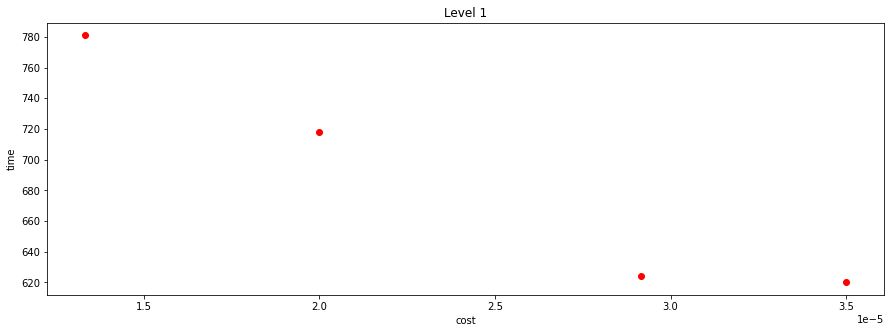

In [79]:
costs = [entity['cost'] for entity in level_to_possibilities[1]]
times = [entity['time'] for entity in level_to_possibilities[1]]
#print(times)
import matplotlib.pyplot as plt
plt.plot(costs, times, 'ro')
plt.ylabel('time')
plt.xlabel('cost')
plt.title('Level 1')
plt.show()
#print(costs)

In [82]:
algo_names = ['level_front-loss','moheft-loss', 'sdbws', 'sdbcs', 'loss-moheft-loss', 'loss-sdbws', 'loss-sdbcs']
budget = 0.16
time = 0.06
w_size = 'e100-large'
algos = {}
for algo in algo_names:
    algo_file = open(f'/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/{w_size}/{budget}_{time}/{algo}-dag.json',)
    algos[algo] = json.load(algo_file)

FileNotFoundError: [Errno 2] No such file or directory: '/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/e100-large/0.16_0.06/loss-moheft-loss-dag.json'

In [81]:
def get_level_to_decision(dag):
    level_to_decision = {}
    for proc in dag['processes']:
        level = proc['level']
        function = proc['config']['deploymentType']
        proc_id = proc['config']['id']
        decision = level_to_decision.get(level, {'time': 0, 'cost': 0, 'functions' : {}})
        decision['functions'][proc_id] = function
        time = proc["finishTime"][function] - proc["startTime"][function]
        price = config['prices']['AWS'][function]
        cost = math.ceil(time / 100)*price
        decision['time'] = max(decision['time'],time)
        decision['cost'] += cost
        level_to_decision[level] = decision
    return level_to_decision

In [65]:
for algo in algo_names:
    algos[algo] = get_level_to_decision(algos[algo])

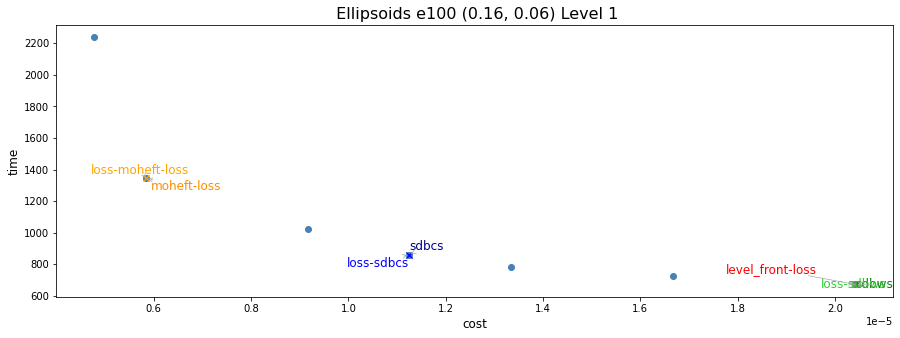

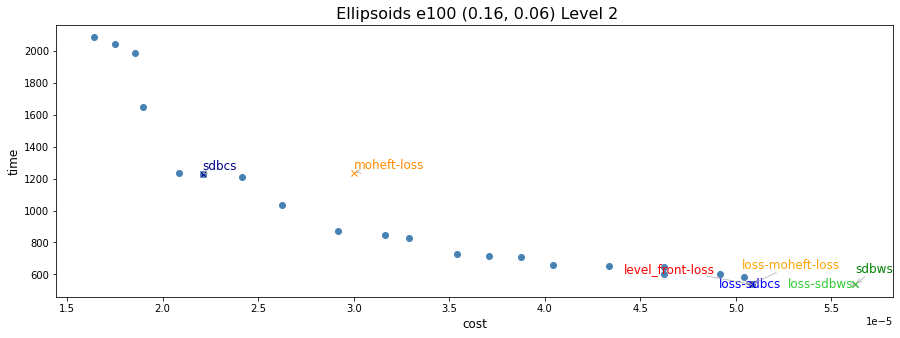

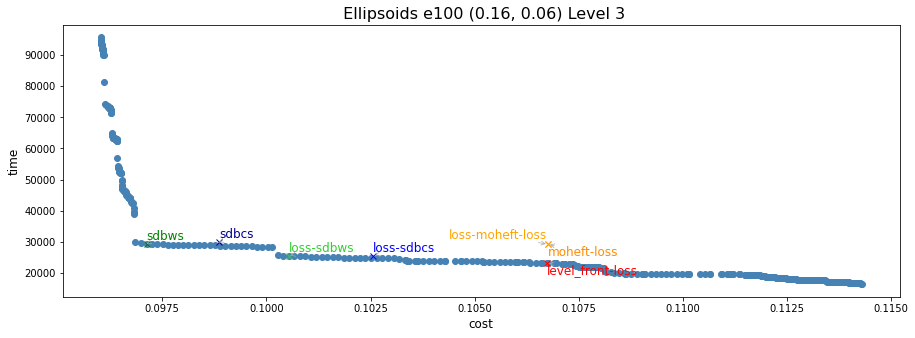

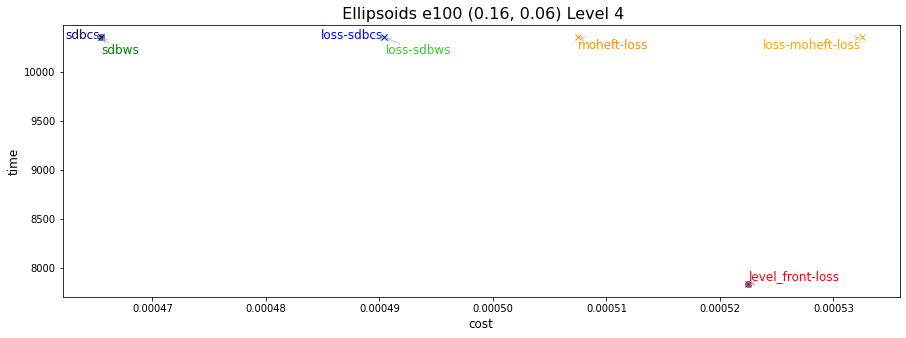

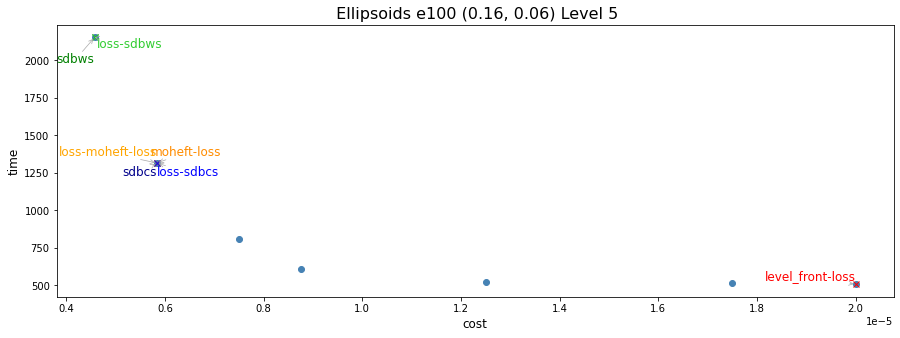

In [67]:
import matplotlib.pyplot as plt
import matplotlib
from adjustText import adjust_text
matplotlib.rcParams['figure.figsize'] = [15, 5]

algo_colors = {'level_front-loss': 'red',
               'moheft-loss' : 'darkorange', 
               'sdbws' : 'green', 
               'sdbcs' : 'darkblue', 
               'loss-moheft-loss' : 'orange', 
               'loss-sdbws' : 'limegreen', 
               'loss-sdbcs' : 'blue'
              }

for level in level_to_possibilities:

    costs = [entity['cost'] for entity in level_to_possibilities[level]]
    times = [entity['time'] for entity in level_to_possibilities[level]]

    plt.plot(costs, times, 'o', color='steelblue')
#    bottom, top = plt.ylim() 
#    bottom -= 1000
#    plt.ylim(bottom,top)
    texts = []
    for algo in algo_names:
        x = algos[algo][level]['cost']
        y = algos[algo][level]['time']
        color = algo_colors[algo]
        texts.append(plt.text(x, y, algo, size=12, color=color))
        plt.plot(x, y, 'x', color=color)
    adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='darkgray', lw=0.7))
    plt.ylabel('time', size=12)
    plt.xlabel('cost', size=12)
    plt.title(f' Ellipsoids {w_size} ({budget}, {time}) Level {level}', size=16)
    plt.show()


In [94]:
print(level_to_sdbcs[8])

{'time': 886, 'cost': 0.00032, 'functions': {310: 'lambda-6144', 103: 'lambda-6144', 206: 'lambda-6144', 309: 'lambda-6144'}}


In [95]:
print(level_to_possibilities[8])

[{'time': 1631, 'cost': 8.0846e-05, 'functions': {103: 'lambda-1024', 206: 'lambda-1024', 309: 'lambda-1536', 310: 'lambda-1024'}}, {'time': 1222, 'cost': 8.500700000000001e-05, 'functions': {103: 'lambda-1024', 206: 'lambda-1024', 309: 'lambda-1536', 310: 'lambda-1536'}}, {'time': 1119, 'cost': 8.583700000000001e-05, 'functions': {103: 'lambda-1024', 206: 'lambda-1024', 309: 'lambda-1536', 310: 'lambda-2048'}}, {'time': 973, 'cost': 8.833300000000001e-05, 'functions': {103: 'lambda-1536', 206: 'lambda-1024', 309: 'lambda-1536', 310: 'lambda-2048'}}, {'time': 921, 'cost': 9.6673e-05, 'functions': {103: 'lambda-1536', 206: 'lambda-1024', 309: 'lambda-1536', 310: 'lambda-2560'}}, {'time': 912, 'cost': 0.000138343, 'functions': {103: 'lambda-1536', 206: 'lambda-1024', 309: 'lambda-1536', 310: 'lambda-5120'}}, {'time': 891, 'cost': 0.000145003, 'functions': {103: 'lambda-1536', 206: 'lambda-1024', 309: 'lambda-1536', 310: 'lambda-6144'}}, {'time': 886, 'cost': 0.00015250000000000002, 'func

In [114]:
#liczę parametry obecnego układu
CURRENT_BUDGET = 0
CURRENT_DEADLINE = 0
for level in level_to_possibilities:
    possibilities = level_to_possibilities[level]
    CURRENT_BUDGET += possibilities[0]['cost']
    CURRENT_DEADLINE += possibilities[0]['time']
    
print(f'CURRENT BUDGET {CURRENT_BUDGET}')
print(f'CURRENT DEADLINE {CURRENT_DEADLINE}')

CURRENT BUDGET 0.5367039114000001
CURRENT DEADLINE 195552


In [89]:
full_front = []

for i in range(len(level_to_possibilities[1])):
    d = [i]
    t = level_to_possibilities[1][i]['time']
    c = level_to_possibilities[1][i]['cost']
    d.append(i)
    full_front.append({
        "decisions": d,
        "time": t,
        "cost": c,
        "level": 1
    })

In [99]:
counter = 0
while(True):
    if full_front[0]['level'] == 6:
        break
    possibilities = level_to_possibilities[full_front[0]['level']+1]
    for index in range(len(level_to_possibilities[full_front[0]['level']+1])):
        d = full_front[0]['decisions'].copy()
        d.append(index)
        t = full_front[0]['time'] + possibilities[index]['time']
        c = full_front[0]['cost'] + possibilities[index]['cost']
        full_front.append({
            "decisions": d,
            "time": t,
            "cost": c,
            "level": full_front[0]['level']+1
        })
    full_front = full_front[1:]
    counter += 1
    if counter % 1000 == 0:
        print(counter)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

KeyboardInterrupt: 

In [98]:
print(len(full_front))
print(len(level_to_possibilities[8]))

5821200
11


In [100]:
output_path = '/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/0.15/brute-levels-in-progress.json'
with  open(output_path,'w+') as f:
    json.dump(full_front, f, indent=2)